In [1]:
def reproduceResult():
  seed_value= 0

  
  with tf.device("/gpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

  


In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import os 
import numpy as np
import tensorflow as tf
import random as rn
from tensorflow import keras

reproduceResult()
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.test.gpu_device_name()
# from scipy import integrate
# import os
# import numpy as np
# from tensorflow import keras
import tempfile
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K


from tensorflow.keras import callbacks

from keras_lr_finder import LRFinder
from clr.clr_callback import CyclicLR

import tensorflow_model_optimization as tfmot

import tqdm

import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from attention import Attention

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from keras.preprocessing.text import Tokenizer


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

from bnlp import SentencepieceTokenizer
import gensim
import fasttext 

C:\Users\moshi\AppData\Local\Temp\ipykernel_16840\2832172220.py:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
df_train = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/EMONOBA/Dataset/emonoba_train.csv')
df_test = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/EMONOBA/Dataset/emonoba_val.csv')

In [4]:
df_train.head

<bound method NDFrame.head of           ID                                               Data  Love  Joy  \
0       5454                            লকাল বাস ভালো এটা থেকে      0    0   
1      22549  কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...     0    0   
2       7033  বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...     0    0   
3      21114                  চাচাজি তো কেবল মাকে ধর্ষণ করেছেন      0    0   
4      23683                          সত্যিকার মানুষ তারাই ভাই      0    1   
...      ...                                                ...   ...  ...   
18415  25861  সমস্যা নাই ইনশাআল্লাহ আমরা একদিন ক্রিকেট কে শা...     0    1   
18416  27263  খানকিরপুলা তর মাকে গিয়ে বল দেহো দিলা মনটা দিলা...     0    0   
18417  13900                                     ভাই চেয়ার কই🙄      0    0   
18418   1208                         সবকয়টা তো একই গোয়ালের গাই      0    0   
18419  18471  বসন্তের ফুলেল উপহার তো পেলাম না' রওশন: আছে আছে...     0    0   

       Surprise  Anger  Sadness  

In [5]:
# Function to get the emotion with value 1 or NaN if all values are 0
def get_emotion(row):
    emotions = ['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']
    nonzero_emotions = [emotion for emotion in emotions if row[emotion] == 1]
    return nonzero_emotions[0] if nonzero_emotions else np.nan

# Create a new column 'Emotion' based on the custom function
df_train['Label'] = df_train.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_train = df_train[['Data', 'Label']]

In [6]:
# Create a new column 'Emotion' based on the custom function
df_test['Label'] = df_test.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_test = df_test[['Data', 'Label']]

In [7]:
df_train.isnull()

,Data,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
18415,False,False
18416,False,False
18417,False,False
18418,False,False


In [8]:
df_train.dropna(inplace=True)

In [9]:
df_train.groupby("Label").describe()

Data                                                               
         count unique                                                top freq
Label                                                                        
Anger     3295   3289  সপ্তাহের চার দিনই নানা মিটিংয়ে হাজিরা দিতে হয়।...    2
Fear       162    162                          যদি গড় গ্রেড সি চলে আসে     1
Joy       6478   6450                                   অনেক ভালো লাগলো     5
Love      3786   3773                                মানুষ মানুষের জন্য     2
Sadness   3975   3974  কে সে? নিশ্চয়ই শয়তান জামাল! : না : তা হলে নিশ্...    2
Surprise   724    723  তাও বলছিস ভালোনা !!! কিন্তু তোরে তো ৪টা প্রশ্ন...    2

In [10]:
df_train["Label"].value_counts()

Joy         6478
Sadness     3975
Love        3786
Anger       3295
Surprise     724
Fear         162
Name: Label, dtype: int64

In [11]:
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [12]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()

In [13]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)

In [14]:
df_train['Data'] = df_train['Data'].apply(apply_bangla_stemming)
df_test['Data'] = df_test['Data'].apply(apply_bangla_stemming)

applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied 

In [15]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1201


In [16]:
# train, test = train_test_split(df, test_size=0.2, stratify = df["classes"], random_state = 42)
num_classes = 6
embed_num_dims = 300
max_seq_len = 50

x_train = df_train['Data']
x_test = df_test['Data']

y_train = df_train['Label']
y_test = df_test['Label']

texts_train = x_train
texts_test = x_test

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['Data'])

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len, padding='pre' )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len,  padding='pre')

print(X_train_pad)

encoding = {
    "Love":0,
    "Joy":1,
    "Sadness":2,
    "Anger":3,
    "Fear":4,
    "Surprise":5
}

y_train = [encoding[x] for x in df_train['Label']]
y_test = [encoding[x] for x in df_test['Label']]



y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


Number of unique words: 24509
[[    0     0     0 ...     7    51    28]
 [    0     0     0 ...    11     2    62]
 [    0     0     0 ...    10  4832  9287]
 ...
 [    0     0     0 ...     3  1927 24508]
 [    0     0     0 ...     8 24509  1447]
 [    0     0     0 ...    34    20    34]]


In [17]:
# META EMBADDING

In [18]:
def create_embedding_matrix(word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open('F:/Python_code/embedding/cc.bn.300.vec',encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix


embedd_matrix_fasttext = create_embedding_matrix(index_of_words, embed_num_dims)
print(embedd_matrix_fasttext.shape)

(24510, 300)


# Random Search

In [19]:
from tensorflow.keras import regularizers
import time
LOG_DIR = f"{int(time.time())}"
seed_value= 0



def build_model(hp):
  
  reproduceResult()

  print('Ya it comes here')
  fake_val = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_unit = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_dropout = hp.Float("cnn_1_dropout",min_value = 0.1,max_value = 0.3,step = 0.1)

  lstm_unit = hp.Int("lstm_unit",min_value =64, max_value = 256, step = 32)
  lstm_dropout = hp.Float("lstm_dropout",min_value = 0.1,max_value = 0.5,step = 0.1)




  seq_input = keras.layers.Input(shape=(max_seq_len,))

  embedded = keras.layers.Embedding(vocab_size,
                          embed_num_dims,
                          input_length = max_seq_len,
                          weights = [embedd_matrix_fasttext])(seq_input)

  cnn = keras.layers.Conv1D(cnn_1_unit,3,kernel_regularizer=regularizers.l2(1e-4),
                            bias_regularizer=regularizers.l2(1e-2),
                            activity_regularizer=regularizers.l2(1e-4))(embedded)
  cnn = keras.layers.Activation(activation='relu')(cnn)
  cnn = keras.layers.BatchNormalization()(cnn)
  cnn = keras.layers.Dropout(cnn_1_dropout,seed=seed_value)(cnn)

  lstm = keras.layers.Bidirectional(keras.layers.LSTM(lstm_unit, recurrent_regularizer=regularizers.l2(1e-4),
                                                      return_sequences=True,kernel_regularizer=regularizers.l2(1e-4),
                                                      bias_regularizer=regularizers.l2(1e-2),
                                                      activity_regularizer=regularizers.l2(1e-4),input_shape =(48,)))(cnn)
  lstm = keras.layers.Activation(activation='relu')(lstm)
  lstm = keras.layers.BatchNormalization()(lstm)
  lstm = keras.layers.Dropout(lstm_dropout,seed=seed_value)(lstm)
  
  
  max_pooling = keras.layers.GlobalMaxPooling1D()(lstm)
  output = keras.layers.Dense(num_classes, activation='softmax')(max_pooling)

  model = keras.Model(inputs = [seq_input], outputs = output)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model


stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=5,
                              restore_best_weights=True,
                              verbose=0, mode='max')


clr_step_size = int((len(X_train_pad)/64))
base_lr = 1e-3
max_lr = 6e-3
mode = 'exp_range'


clr = CyclicLR(base_lr = base_lr, max_lr = max_lr, step_size = clr_step_size, mode = mode)



tuner = RandomSearch(
    build_model,
    objective = keras_tuner.Objective('val_accuracy', direction="max"),
    max_trials = 30,
    executions_per_trial = 1,
    directory = LOG_DIR
    )
  
tuner.search(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))


tuner.results_summary()

Trial 30 Complete [00h 01m 40s]
val_accuracy: 0.5857352018356323

Best val_accuracy So Far: 0.6101611852645874
Total elapsed time: 00h 31m 02s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1708752698\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 13 summary
Hyperparameters:
cnn_1_unit: 16
cnn_1_dropout: 0.2
lstm_unit: 224
lstm_dropout: 0.2
Score: 0.6101611852645874

Trial 26 summary
Hyperparameters:
cnn_1_unit: 48
cnn_1_dropout: 0.2
lstm_unit: 160
lstm_dropout: 0.2
Score: 0.5969711542129517

Trial 19 summary
Hyperparameters:
cnn_1_unit: 80
cnn_1_dropout: 0.1
lstm_unit: 64
lstm_dropout: 0.30000000000000004
Score: 0.594040036201477

Trial 24 summary
Hyperparameters:
cnn_1_unit: 48
cnn_1_dropout: 0.1
lstm_unit: 192
lstm_dropout: 0.30000000000000004
Score: 0.593551516532898

Trial 28 summary
Hyperparameters:
cnn_1_unit: 64
cnn_1_dropout: 0.1
lstm_unit: 128
lstm_dropout: 0.5
Score: 0.5920859575271606

Trial 01 summary
Hyperp

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
cnn_1_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}
cnn_1_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
lstm_unit (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
lstm_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [21]:
#get best hypoerparamter
best_hps = tuner.get_best_hyperparameters()[0]
model = build_model(best_hps)

Ya it comes here


In [22]:
history = model.fit(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))

Epoch 1/30
288/288 [==============================] - 9s 23ms/step - loss: 3.9460 - accuracy: 0.4587 - val_loss: 2.1859 - val_accuracy: 0.2233
Epoch 2/30
288/288 [==============================] - 6s 20ms/step - loss: 1.0783 - accuracy: 0.6636 - val_loss: 1.1677 - val_accuracy: 0.5911
Epoch 3/30
288/288 [==============================] - 6s 20ms/step - loss: 0.6457 - accuracy: 0.7972 - val_loss: 1.4203 - val_accuracy: 0.5237
Epoch 4/30
288/288 [==============================] - 6s 20ms/step - loss: 0.5259 - accuracy: 0.8307 - val_loss: 1.2614 - val_accuracy: 0.5843
Epoch 5/30
288/288 [==============================] - 6s 20ms/step - loss: 0.3468 - accuracy: 0.8973 - val_loss: 1.7655 - val_accuracy: 0.5090
Epoch 6/30
288/288 [==============================] - 6s 20ms/step - loss: 0.3673 - accuracy: 0.8870 - val_loss: 1.5184 - val_accuracy: 0.5779
Epoch 7/30
288/288 [==============================] - 6s 20ms/step - loss: 0.2537 - accuracy: 0.9255 - val_loss: 1.6696 - val_accuracy: 0.5662

In [23]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

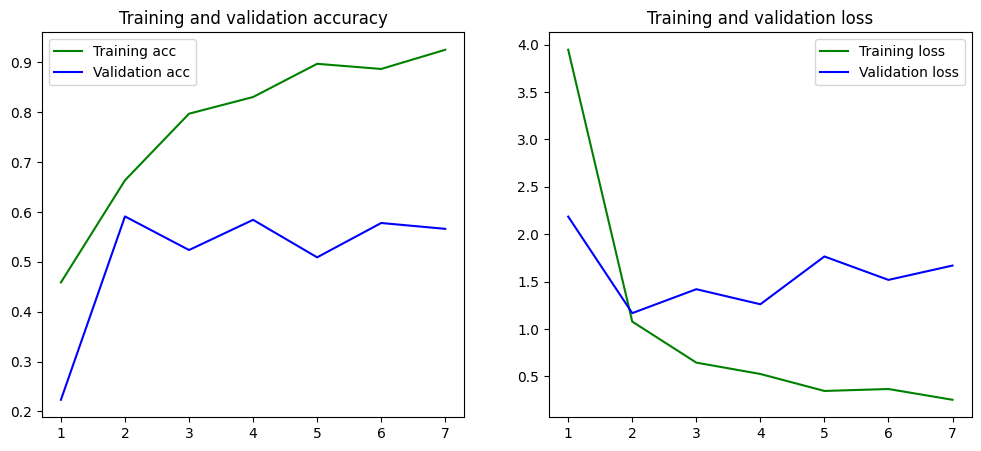

In [24]:
PlotGraph(history)

In [25]:
predict = model.predict(X_test_pad)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

64/64 [==============================] - 1s 5ms/step


array([0, 3, 0, ..., 1, 2, 1], dtype=int64)

In [26]:
predict_lables=np.argmax(y_test, axis=1)
predict_lables

array([1, 3, 1, ..., 1, 2, 3], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict_lables, predict_class)
cm

array([[256, 120,   6,  30,   0,   2],
       [204, 439,  28,  61,   1,  10],
       [ 11,  54, 284,  76,   1,   3],
       [ 40,  50,  49, 216,   0,   7],
       [  2,   5,   2,  11,   0,   0],
       [  3,  23,  17,  20,   1,  15]], dtype=int64)

In [28]:
class_names = list(encoding.keys())

In [29]:
print(class_names)

['Love', 'Joy', 'Sadness', 'Anger', 'Fear', 'Surprise']


<Axes: >

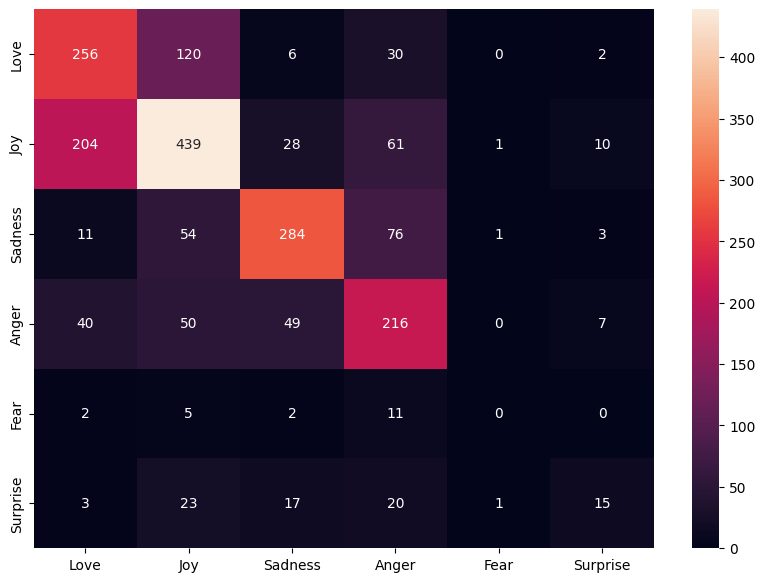

In [30]:
df_cm = pd.DataFrame(cm, index=class_names,columns=class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")

In [31]:
from sklearn.metrics import classification_report
print(classification_report(predict_lables, predict_class, target_names =class_names))

              precision    recall  f1-score   support

        Love       0.50      0.62      0.55       414
         Joy       0.64      0.59      0.61       743
     Sadness       0.74      0.66      0.70       429
       Anger       0.52      0.60      0.56       362
        Fear       0.00      0.00      0.00        20
    Surprise       0.41      0.19      0.26        79

    accuracy                           0.59      2047
   macro avg       0.47      0.44      0.45      2047
weighted avg       0.59      0.59      0.59      2047

